<a href="https://www.kaggle.com/ranvitha123/plant-disease-model?scriptVersionId=88482173" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL as pil
from PIL import Image as im
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

2022-02-22 14:40:59.970308: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
imgPaths = []
imgDiseases = []
imgIDs = []

for dirname, _, filenames in os.walk('/kaggle/input/researchdata/Dataset/Data'):
    for filename in filenames:
        imgPaths.append(os.path.join(dirname, filename))
        imgIDs.append(filename)
        osPathList = dirname.split('/')
        imgDiseases.append(osPathList[-1] + ' (' + osPathList[-2] + ')')

In [3]:
#creates the dataframe, with columns for the ID, type of plant, type of disease, and full path of each image
plantDF = pd.DataFrame()
plantDF["ID"] = imgIDs
plantDF["Diseases"] = imgDiseases
plantDF["Path"] = imgPaths
plantDF

,ID,Diseases,Path
0,e56354a5-5e3f-4ed6-bfe5-3c783a32dc98___RS_Erly...,Early Blight (Tomato),/kaggle/input/researchdata/Dataset/Data/Tomato...
1,cf8c6e28-201c-4c8e-994f-8dcf98362e64___RS_Erly...,Early Blight (Tomato),/kaggle/input/researchdata/Dataset/Data/Tomato...
2,a3d07302-420d-4b4e-94f2-6694ef9d2088___RS_Erly...,Early Blight (Tomato),/kaggle/input/researchdata/Dataset/Data/Tomato...
3,e11ee1f8-8de2-4d9c-a0c1-86bc42350fd9___RS_Erly...,Early Blight (Tomato),/kaggle/input/researchdata/Dataset/Data/Tomato...
4,e94d68c8-f185-4b3d-9b44-ad12e3dc891d___RS_Erly...,Early Blight (Tomato),/kaggle/input/researchdata/Dataset/Data/Tomato...
...,...,...,...
76156,c6c8843f-6b36-472a-9a87-bf1a235e08b6___RS_LB 5...,Late Blight (Potato),/kaggle/input/researchdata/Dataset/Data/Potato...
76157,ce38cb15-70c8-4203-adbb-db648eb87554___RS_LB 4...,Late Blight (Potato),/kaggle/input/researchdata/Dataset/Data/Potato...
76158,201186ce-cec5-47ef-9f88-bd8c4abab2c8___RS_LB 2...,Late Blight (Potato),/kaggle/input/researchdata/Dataset/Data/Potato...
76159,01ad74ce-eb28-42c7-9204-778d17cfd45c___RS_LB 2...,Late Blight (Potato),/kaggle/input/researchdata/Dataset/Data/Potato...


In [4]:
#resamples the dataset so that each disease has an equal number of images (1000)
arrDisList = np.array(plantDF["Diseases"])
uniqs = np.unique(arrDisList)
sampPlantDF = (shuffle(pd.concat([plantDF[plantDF["Diseases"] == dis].sample(1500, replace = True) for dis in uniqs], ignore_index = True)))
sampPlantDF = sampPlantDF.reset_index().drop(["index"], axis = 1)
sampPlantDF

,ID,Diseases,Path
0,0999b486-f391-4b79-8c3f-41e957e606a7___Rutg._H...,Healthy (Peach),/kaggle/input/researchdata/Dataset/Data/Peach/...
1,cb6ab433-8af6-480f-889a-e5e53df5992c___Com.G_T...,Target Spot (Tomato),/kaggle/input/researchdata/Dataset/Data/Tomato...
2,d6248627-9a42-424d-95d3-ca56eb076206___Rutg._H...,Healthy (Peach),/kaggle/input/researchdata/Dataset/Data/Peach/...
3,b7cc5fb5-a617-4137-bd5f-2236413ec4bc___RS_NLB ...,Northern Leaf Blight (Corn),/kaggle/input/researchdata/Dataset/Data/Corn/N...
4,1071281e-821c-4570-adcf-42ae805ec8c9___FAM_B.R...,Black Rot (Grape),/kaggle/input/researchdata/Dataset/Data/Grape/...
...,...,...,...
49495,04ba0ca5-c52c-4bab-897b-2d38f7835a03___RS_Late...,Late Blight (Tomato),/kaggle/input/researchdata/Dataset/Data/Tomato...
49496,43e84adf-0897-47dc-97a4-94ef0e83eef5___RS_Erly...,Early Blight (Tomato),/kaggle/input/researchdata/Dataset/Data/Tomato...
49497,35f27251-e796-4906-80a3-1836f8bce8a3___FAM_B.M...,Esca (Grape),/kaggle/input/researchdata/Dataset/Data/Grape/...
49498,ab52bc97-6e53-4e96-b54c-c883999143ae___RS_Erly...,Early Blight (Tomato),/kaggle/input/researchdata/Dataset/Data/Tomato...


In [5]:
#splits dataframe into three separate dataframes for train, val, and test
trainValDF, testDF = train_test_split(sampPlantDF, test_size = 0.125, stratify = sampPlantDF["Diseases"])
trainDf, valDf = train_test_split(trainValDF, test_size = 0.125, stratify = trainValDF["Diseases"])

trainDf = trainDf.reset_index().drop(['index'], axis =1)
valDf = valDf.reset_index().drop(["index"], axis = 1)
testDF = testDF.reset_index().drop(["index"], axis = 1)

In [6]:
#creates sub-directories for training, validation, and testing data, and sub-directories within these for each plant species and disease
os.mkdir('/kaggle/augfolder')
os.mkdir('/kaggle/augfolder/train')
os.mkdir('/kaggle/augfolder/val')
os.mkdir('/kaggle/augfolder/test')

for species in os.listdir('/kaggle/input/researchdata/Dataset/Data'):
    for disease in os.listdir('/kaggle/input/researchdata/Dataset/Data/' + species):
        os.mkdir('/kaggle/augfolder/train/' + disease + ' (' + species + ')')
        os.mkdir('/kaggle/augfolder/val/' + disease + ' (' + species + ')')
        os.mkdir('/kaggle/augfolder/test/' + disease + ' (' + species + ')')

In [7]:
#adds and resizes images from train, val, and test dataframes to their sub-directories

for index, x in enumerate(trainDf["Path"]):
    resized = im.open(x).resize((256,256))
    resized.save('/kaggle/augfolder/train/' + trainDf["Diseases"][index] + '/' + trainDf["ID"][index])

for index, x in enumerate(valDf["Path"]):
    resized = im.open(x).resize((256,256))
    resized.save('/kaggle/augfolder/val/' + valDf["Diseases"][index] + '/' + valDf["ID"][index])

for index, x in enumerate(testDF["Path"]):
    resized = im.open(x).resize((256,256))
    resized.save('/kaggle/augfolder/test/' + testDF["Diseases"][index] + '/' + testDF["ID"][index])

In [8]:
#augments images in train directory
augmentor = IDG(rotation_range = 5, width_shift_range = 0.1, height_shift_range = 0.1, zoom_range = 0.1, rescale = 1./255, fill_mode = 'nearest')
traingen = augmentor.flow_from_directory('/kaggle/augfolder/train', target_size = (256, 256), class_mode = 'categorical')
valgen = augmentor.flow_from_directory('/kaggle/augfolder/val', target_size = (256, 256), class_mode = 'categorical')
#adds images to test directory (unaugmented)
testaug = IDG(rescale = 1./255, fill_mode = 'nearest')
testgen = testaug.flow_from_directory('/kaggle/augfolder/test', target_size=(256,256), class_mode = 'categorical')

Found 29759 images belonging to 33 classes.
Found 5238 images belonging to 33 classes.
Found 5943 images belonging to 33 classes.


In [9]:
model = Sequential()
model.add(Conv2D(32, (10,10), activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D((32,32)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(len(uniqs), activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ["accuracy"])

2022-02-22 14:46:25.762187: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-22 14:46:25.765974: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-02-22 14:46:25.806866: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-22 14:46:25.807535: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-02-22 14:46:25.807591: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-02-22 14:46:25.835434: I tensorflow/stream_executor/platform/def

In [10]:
history = model.fit(traingen, epochs = 30, validation_data = valgen, callbacks = [EarlyStopping(monitor = "val_loss", patience = 10)])

2022-02-22 14:46:28.611573: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-22 14:46:28.615940: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000175000 Hz


Epoch 1/30


2022-02-22 14:46:29.194858: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-02-22 14:46:30.149844: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-02-22 14:46:30.194330: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


930/930 [==============================] - 501s 532ms/step - loss: 3.3307 - accuracy: 0.0651 - val_loss: 2.7199 - val_accuracy: 0.1961
Epoch 2/30
930/930 [==============================] - 488s 524ms/step - loss: 2.4368 - accuracy: 0.2831 - val_loss: 1.8983 - val_accuracy: 0.4364
Epoch 3/30
930/930 [==============================] - 499s 536ms/step - loss: 1.8120 - accuracy: 0.4549 - val_loss: 1.5668 - val_accuracy: 0.5185
Epoch 4/30
930/930 [==============================] - 494s 531ms/step - loss: 1.4272 - accuracy: 0.5605 - val_loss: 1.2595 - val_accuracy: 0.6130
Epoch 5/30
930/930 [==============================] - 495s 532ms/step - loss: 1.2278 - accuracy: 0.6148 - val_loss: 1.0860 - val_accuracy: 0.6516
Epoch 6/30
930/930 [==============================] - 501s 538ms/step - loss: 1.0745 - accuracy: 0.6595 - val_loss: 1.0648 - val_accuracy: 0.6775
Epoch 7/30
930/930 [==============================] - 504s 542ms/step - loss: 0.9769 - accuracy: 0.6977 - val_loss: 0.9505 - val_accura

In [11]:
testhist = model.evaluate(testgen)

186/186 [==============================] - 13s 69ms/step - loss: 0.3083 - accuracy: 0.9068


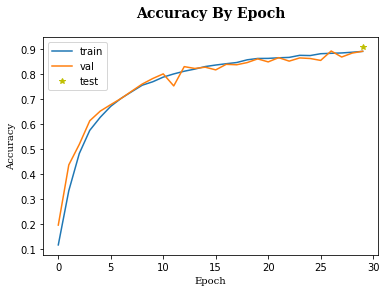

In [12]:
titleFont = {'family' : 'serif', 'color' : 'black', 'weight' : 'bold', 'size' : 14}
axesFont = {'family' : 'serif', 'color' : 'black', 'weight' : 'normal', 'size' : 10}
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(len(history.history['accuracy'])-1, testhist[1], 'y*', label = 'test')
plt.title('Accuracy By Epoch', fontdict = titleFont, pad = 20)
plt.xlabel('Epoch', fontdict = axesFont)
plt.ylabel('Accuracy', fontdict = axesFont)
plt.legend(['train', 'val', 'test'], loc = 'upper left')
plt.show()

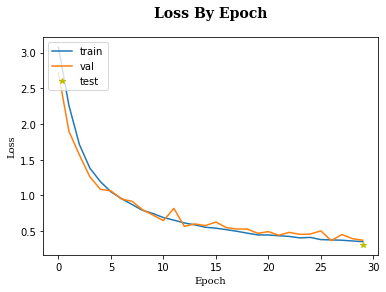

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(len(history.history['accuracy'])-1, testhist[0], 'y*', label = 'test')
plt.title('Loss By Epoch', fontdict = titleFont, pad = 20)
plt.ylabel('Loss', fontdict = axesFont)
plt.xlabel('Epoch', fontdict = axesFont)
plt.legend(['train', 'val', 'test'], loc = 'upper left')
plt.show()

In [14]:
model.save('/kaggle/working/plantModel.h')

2022-02-22 19:01:00.457724: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
